# <center>PIB e Expectativa de Vida pela OMS</center>

<img src="https://www.moneycrashers.com/wp-content/uploads/2019/04/gross-domestic-product-definition.jpg" alt="GDP" style="zoom:15%;" />

Este trabalho foi realizado por Vinicius Ferreira Amim, sendo o primeiro projeto voltado a Data Visualization de uma série de projetos em Ciência de Dados.

Iremos analisar os dados do PIB e expectativa de vida extraídas da Organização Mundial de Saúde e o Banco Mundial, o objetivo é tentar identificar a relação entre o PIB e a expectativa de vida entre 6 países.

Os dados foram obtidos pela [codeacademy](https://www.codecademy.com/) e através dos gráficos gerados faremos algumas conclusões.

### 1. Introdução

O produto interno bruto (PIB) é um indicador econômico, que, em linhas gerais, representa a soma (em valores monetários) de todos os bens e serviços finais produzidos numa determinada região. O PIB é um dos indicadores mais utilizados na macroeconomia para quantificar a atividade econômica de uma região.

Um dos critérios de IDH (Índice de Desenvolvimento Humano) é a qualidade de vida segundo o Produto Interno Bruto per capita, que se refere ao total de bens e serviços produzidos durante um ano pelo país dividido pelo número de habitantes, indicando assim o que cada pessoa produziu. Esse critério reflete o padrão de vida de cada habitante.

O conjunto de dados (dataset) nos fornece informações sobra 6 países, abaixo uma breve explicação sobre as colunas existentes e o que elas representam:

- **Country / País** – *Nação*
- **Year / Ano** – *O ano da observação*
- **Life expectancy at birth (years) / Expectativa de vida ao nascer (anos)** – *Valor da expectativa de vida em anos.*
- **GDP / PIB** – *Produto interno bruto em dólares americanos.*

### 2. Hipóteses

### 3. Importação dos Pacotes Python

Vamos importar as bibliotecas da linguagem de programação Python

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importando Dataset
df = pd.read_csv('all_data.csv')

### 4. Exploração e Preparação do Dataset

In [5]:
# Verificando o data set
print(df.head())
print(df.columns)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


In [3]:
# Verificando valores NaN ou missing values
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [25]:
# Vamos mudar o nome da coluna Life
df.rename(columns = {
    'Life expectancy at birth (years)' : 'LEB'
}, inplace = True)

df.head()

,Country,Year,LEB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Mudamos a coluna *'Life expectancy at birth (years)'* para uma abreviação *'LEB'* apenas para facilitar 

Ótimo, o dataset não tem valores nulos.

In [24]:
# Agrupar os paises
agrupar_paises = df.groupby('Country')[['GDP', 'LEB']].mean().sort_values(['LEB'], ascending=False)
agrupar_paises

,GDP,LEB
Country,,
Germany,3.094776e+12,79.65625
Chile,1.697888e+11,78.94375
United States of America,1.407500e+13,78.06250
Mexico,9.766506e+11,75.71875
China,4.957714e+12,74.26250
Zimbabwe,9.062580e+09,50.09375


### 5. Visualizando os dados

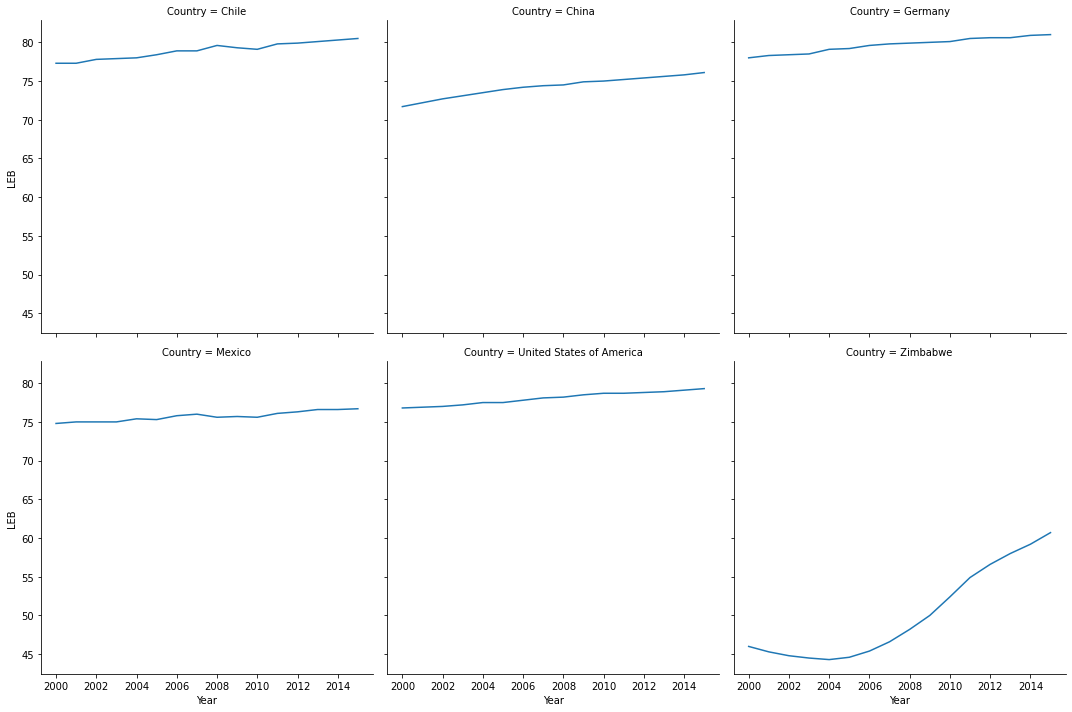

In [28]:
sns.relplot(x='Year', y='LEB', data=df, kind='line', col ='Country', col_wrap=3)
plt.show()